# Abductive Loop - Loop 1

## Experiment: Collective Identity and the Group Ultimatum Game (Scope Condition Check)
The following report details the analysis for the scope condition check of the group ultimatum game.
Here, the scope condition is that the Phase 1 portion of the experiment - the Anagrams game - does in fact produce a measurable level of collective identity in the subjects over random chance. 


## Date Prepared: 24 November 2017
The data informing this abductive loop was collected over the summer/fall 2017.


## Exploratory / Confirmatory Experiment
There are no pre-existing results that we could directly use to inform priors and build models for this interaction.
Therefore, this is an exploratory experiment wherein we are attempting to build parameter estimates for a linear Bayesian model.
As part of an exploratory analysis we need to show two items:

1. That the models and treatments we have chosen support the testing of the hypothesis.
2. That the parameters learned by the model have sufficiently high confidence to be predictive in confirmatory experiments.

## Quantifiable Observables

In the NGS2 program of which we are a part, collective identity is defined as the choice for resource allocation. Therefore, we have chosen the following measures. The DIFI score, wherein it does not necessarily reflect resource allocation, is meant to serve as supporting evidence for the public goods game contribution.

1. DIFI Score (pre-game, post-anagrams if applicable, post-public goods game)
2. Public Goods Game Score


## Hypothes(i/e)s Tested

Because we are in the exploratory phase of the experiment, our hypotheses will be *underspecified* with respect to effect size.
Upon transitioning to confirmatory experiments, the effect size will be specified, and it will be captured in the model + parameter joint specification.
For exploratory experiments, the effect size is roughly equivalent to specifying parameter estimates.

**Note: In the prior loop we investigated the impact of the pre-game DIFI score and found no impactful effect. Found no relation among the variables of group size at the scales tested.**

1. Public Goods Game Contributions rise when the Anagrams Game is played vs. when it is not (effect size of rise will be determined by model parameters).

    1. Increasing the number of players will have an effect (±) on collective identity in the form of public goods game contributions.
    
    


## Priors Specified

No priors are included in the models; objective priors are used throughout the modeling parameter evaluation steps.

## Conclusions / Next Steps

Unfortunately, the connectivity does not appear to have much of an effect on the contribution level of the public goods game.
Next steps determined by desired application: if desire is to instantiate collective identity, then move on to a new experimental procedure.
If desire is to establish what went wrong, then it would be to go to the literature to suggest a new procedure - in this case in-person experiments.

## Abductive Loop - Loop 1

In [1]:
import pandas as pd
import sys
sys.path.append('../src/montage/')

from models.LinearBayesian import LinearBayesian
from abloop.abloop import Abloop

import json

import seaborn as sns


from matplotlib import pyplot as plt
%matplotlib inline

## Create New Loop, Import Experiment Data, and List (Observational) Features

In [2]:
loop = Abloop()
loop.import_csv('../data/output/grp-by-sessionId.csv', 0)
loop.print_features()

Available Features:
    difi_pregame_mean
    difi_pregame_var
    difi_overlap_pregame_mean
    difi_overlap_pregame_var
    requestDiversity_mean
    requestDiversity_var
    participationRate_mean
    participationRate_var
    correctResponseRate_mean
    correctResponseRate_var
    letterRequestRate_mean
    letterRequestRate_var
    difi_linear_postgame_mean
    difi_linear_postgame_var
    difi_overlap_postgame_mean
    difi_overlap_postgame_var
    responseTimes_mean
    responseTimes_var
    pggContribution_mean
    pggContribution_var


## Specify Input/Output Variables from Data

In [3]:
input_variables = [
    'difi_pregame_mean',
    'difi_pregame_var',
    'difi_overlap_pregame_mean',
    'difi_overlap_pregame_var',
    'requestDiversity_mean',
    'requestDiversity_var',
    'participationRate_mean',
    'participationRate_var',
    'correctResponseRate_mean',
    'correctResponseRate_var',
    'letterRequestRate_mean',
    'letterRequestRate_var',
]

output_variables = [
    'difi_linear_postgame_mean',
    'difi_linear_postgame_var',
    'difi_overlap_postgame_mean',
    'difi_overlap_postgame_var',
    'responseTimes_mean',
    'responseTimes_var',
    'pggContribution_mean',
    'pggContribution_var',
]

loop.set_input_output(input_variables, output_variables)

## Load Hypothesis

In [4]:
# Hypothesis 1.
x = ['difi_pregame_mean', 
     'difi_pregame_var', 
     'difi_overlap_pregame_mean', 
     'difi_overlap_pregame_var']

y = ['pggContribution_mean']

loop.add_hypothesis(x,y, LinearBayesian())

# Hypothesis 2.
x = ['requestDiversity_mean',
     'requestDiversity_var',]

y = ['pggContribution_mean']

loop.add_hypothesis(x,y, LinearBayesian())

# Hypothesis 3.
x = ['participationRate_mean',
     'participationRate_var',
     'correctResponseRate_mean',
     'correctResponseRate_var',
     'letterRequestRate_mean',
     'letterRequestRate_var',]

y = ['pggContribution_mean']

loop.add_hypothesis(x,y, LinearBayesian())

## Load Treatment File

In [5]:
with open('../data/output/treatments.json') as oFile:
    treatments = json.load(oFile)
    
for k,v in treatments.iteritems():
    loop.add_treatment(v,label=k)

## Plot P(y|T)
1. y = public goods game contribution
2. T = treatments

In [6]:
# Effect Sizes
loop.estimate_treatment_effect_size(loop.hypotheses[0], 'Anagrams=0', 'Anagrams=1')

-0.11310680226162141

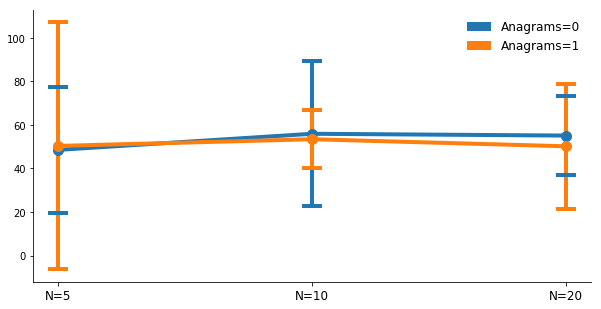

In [7]:
#loop.plot_treatment_distribution(loop.hypotheses[0],'K=2','K=4','K=8')
#loop.plot_treatment_distribution(loop.hypotheses[0],'N=5','N=10','N=20')
loop.plot_treatment_distribution(loop.hypotheses[0],['N=5','N=10','N=20'],['Anagrams=0','Anagrams=1'])

## Model Parameter Estimates for Each Hypothesis: $P(\beta, \sigma | y)$

In [8]:
loop.estimate()
loop.print_estimates()

Hypothesis 0
difi_pregame_mean                       [ 16.05704162]
difi_pregame_var                        [ 10.95261]
difi_overlap_pregame_mean               [-14.2777663]
difi_overlap_pregame_var                [-7.29335421]
difi_pregame_mean                       [ 287.1242853]
Hypothesis 1
requestDiversity_mean                   [ 3.28302414]
requestDiversity_var                    [ 5.50700812]
requestDiversity_mean                   [ 367.70794408]
Hypothesis 2
participationRate_mean                  [-6.11927472]
participationRate_var                   [ 5.42699574]
correctResponseRate_mean                [ 5.44860092]
correctResponseRate_var                 [-1.07731534]
letterRequestRate_mean                  [-15.85204352]
letterRequestRate_var                   [ 10.98667638]
participationRate_mean                  [ 333.63432088]


## Conduct Validation Study 
(for this exercise; use training set to show relatively low error - to advance need to show on out-of-sample test)

In [9]:
loop.validate()

In [10]:
loop.abduce_hypotheses()

**Interpretation of Hypothesis Given Error: If given a model with mse error, probability of that error being generated by models in the hypotheses set.**

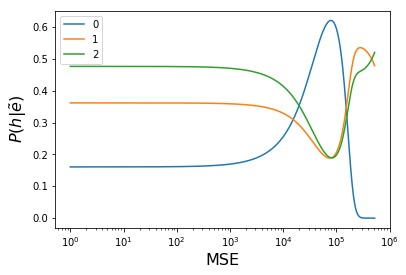

In [11]:
loop.plot_abduce_hypotheses()

**Interpretation: Given a set of hypotheses and an experimental platform, what is the likelihood of seeing a given hypothesis/error combination?**

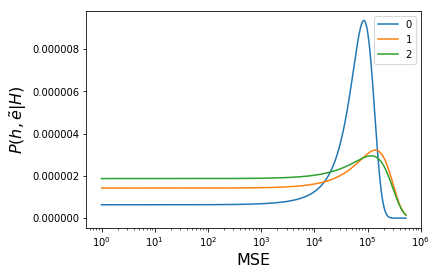

In [12]:
loop.plot_abduce_hypotheses_marginal()

## Use Mutual Information to determine the next set of input features with potential.

In [13]:
loop.abduce_results('pggContribution_mean')

difi_overlap_pregame_var     0.517940
difi_overlap_pregame_mean    0.439017
difi_pregame_mean            0.438161
requestDiversity_var         0.433535
requestDiversity_mean        0.402456
difi_pregame_var             0.379642
letterRequestRate_mean       0.332394
correctResponseRate_mean     0.313915
letterRequestRate_var        0.281218
correctResponseRate_var      0.175206
participationRate_var        0.047277
participationRate_mean       0.047277
Name: pggContribution_mean, dtype: float64

# To-do:

1. Load Null Hypothesis Automatically
2. Have Plots of Histograms (like before)
3. Treatments
3. Add in n-persons.
4. Show difference in MI.